In [1]:
import qiskit

C:\Users\FLL-Home\AppData\Roaming\Python\Python36\site-packages\qiskit\__init__.py:67: DeprecationWarning: Using Qiskit with Python 3.6 is deprecated as of the 0.17.0 release. Support for running Qiskit with Python 3.6 will be removed in a future release.
  "future release.", DeprecationWarning)


In [2]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [3]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [8]:
# Let's see the result
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

Practice Problem 1.  Answer A

In [29]:
QuantumCircuit(4, 4) # correct for 4 qubits and 4 conventional bits
#QuantumCircuit(4)    # Correct for only 4 qubits
#QuantumCircuit(QuantumRegister(4, 'qr0'), QuantumRegister(4, 'crl')) #incorrect
#QuantumCircuit([4,4]) # incorrect

Practice Problem 2. Answer C

Given this code fragment, what is the probability that a measurement would result in |0> ? 

In [28]:
from qiskit import Aer, execute, QuantumCircuit
##from qiskit.quantum_info import Statevector

backend = Aer.get_backend("statevector_simulator")

In [17]:
qc = QuantumCircuit(1)
qc.ry(3 * pi/4, 0)

In [18]:
print(qc)
result = execute(qc, backend=backend, shots=1).result()
print('State Vector:', result.get_statevector() )

     ┌──────────┐
q_0: ┤ RY(3π/4) ├
     └──────────┘
State Vector: [0.38268343+0.j 0.92387953+0.j]


In [20]:
0.38268343 ** 2

0.1464466075965649

In [21]:
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

Practice Problem 3. Answer D

Assuming the fragment below, which three code fragments would produce the circuit illustrated?

In [31]:
from qiskit import QuantumRegister # Added to run QR

In [35]:
inp_reg = QuantumRegister(2, name='inp') 
ancilla = QuantumRegister(1, name='anc') 
qc = QuantumCircuit(inp_reg, ancilla)

In [36]:
qc.h(inp_reg[0])
qc.h(inp_reg[1])
qc.x(ancilla[0])
qc.draw()

┌───┐
inp_0: ┤ H ├
       ├───┤
inp_1: ┤ H ├
       ├───┤
anc_0: ┤ X ├
       └───┘

Practice Problem 4.  Answer A

Given an empty QuantumCircuit object, qc, with three qubits and three classical bits, which one of these code fragments would create this circuit? 

In [60]:
qc = QuantumCircuit(3, 3)  # create circuits for problem

In [51]:
qc.measure([0,1,2], [0,1,2]) # A
qc.draw()

┌─┐      
q_0: ┤M├──────
     └╥┘┌─┐   
q_1: ─╫─┤M├───
      ║ └╥┘┌─┐
q_2: ─╫──╫─┤M├
      ║  ║ └╥┘
c: 3/═╩══╩══╩═
      0  1  2

In [57]:
qc.measure([0,0], [1,1], [2,2])  # Answer B; Error results
qc.draw()

TypeError: measure() takes 3 positional arguments but 4 were given

In [61]:
qc.measure_all() # provides the answer; however, it adds the barrier
qc.draw()

░ ┌─┐      
   q_0: ─░─┤M├──────
         ░ └╥┘┌─┐   
   q_1: ─░──╫─┤M├───
         ░  ║ └╥┘┌─┐
   q_2: ─░──╫──╫─┤M├
         ░  ║  ║ └╥┘
   c: 3/════╬══╬══╬═
            ║  ║  ║ 
meas: 3/════╩══╩══╩═
            0  1  2

In [59]:
qc.measure(0,1,2) # Answer D: error results
qc.draw()

TypeError: measure() takes 3 positional arguments but 4 were given

Practice Problem 5. Answer A

Which code fragment will produce a maximally entangled, or Bell, state?


In [66]:
bell = QuantumCircuit(2)  # A provides 1/sqrt(2)(|01> + |10)
bell.h(0)
bell.x(1)
bell.cx(0, 1)
bell.draw() # Added to provide result

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘

In [67]:
# Let's get the result:
qobj = assemble(bell)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

In [68]:
bell = QuantumCircuit(2) # B provides 1/sqrt(2)(|10> + |11)
bell.cx(0, 1)
bell.h(0)
bell.x(1)
bell.draw() # Added to provide result

┌───┐
q_0: ──■──┤ H ├
     ┌─┴─┐├───┤
q_1: ┤ X ├┤ X ├
     └───┘└───┘

In [69]:
# Let's get the result:
qobj = assemble(bell)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

In [70]:
bell = QuantumCircuit(2) # C provides 1/sqrt(2)(|10> - |11)
bell.h(0)
bell.x(1)
bell.cz(0, 1)
bell.draw() # Added to provide result

┌───┐   
q_0: ┤ H ├─■─
     ├───┤ │ 
q_1: ┤ X ├─■─
     └───┘

In [71]:
# Let's get the result:
qobj = assemble(bell)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

In [72]:
bell = QuantumCircuit(2)  # D provides |00>
bell.h(0)
bell.h(0)
bell.draw() # Added to provide result

┌───┐┌───┐
q_0: ┤ H ├┤ H ├
     └───┘└───┘
q_1: ──────────

In [73]:
# Let's get the result:
qobj = assemble(bell)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

Practice Problem 6.  Answer A (qc.h(0) hadamarand and C (qc.ry(pi / 2, 0))

Given this code, which two inserted code fragments result in the state vector 
represented by this Bloch sphere?


In [91]:
# install for visualizations
import numpy as np
from qiskit import QuantumCircuit, IBMQ, transpile
from qiskit.visualization import plot_histogram, plot_gate_map, plot_circuit_layout, plot_bloch_vector, plot_bloch_multivector
from qiskit.tools.monitor import job_monitor
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

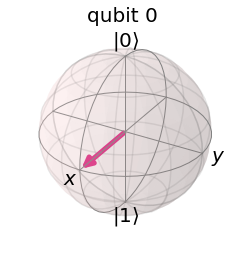

In [92]:
qc = QuantumCircuit(1,1) # A Correct along with option C
qc.h(0)

simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc)
plot_bloch_multivector(outputstate)

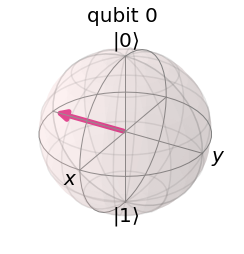

In [96]:
qc = QuantumCircuit(1,1) # B replaced math.pi with pi 
qc.rx(pi / 2, 0)

simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc)
plot_bloch_multivector(outputstate)

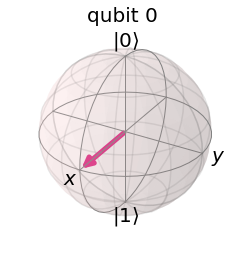

In [98]:
qc = QuantumCircuit(1,1) # C  Also Correct
qc.ry(pi / 2, 0)

simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc)
plot_bloch_multivector(outputstate)

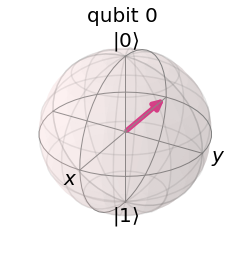

In [100]:
qc = QuantumCircuit(1,1) # D replaced math.pi with pi
qc.rx(pi / 2, 0)
qc.rz(-pi / 2, 0)


simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc)
plot_bloch_multivector(outputstate)

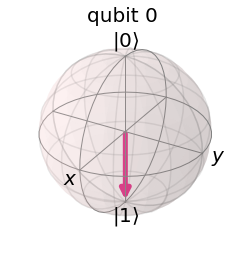

In [102]:
qc = QuantumCircuit(1,1) # E  replaced math.pi with pi
qc.ry(pi, 0)

simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc)
plot_bloch_multivector(outputstate)

Practice problem 7. Answer B.  Possible added phase simulator as proof?

S-gate is a Qiskit phase gate with what value of the phase parameter? 
A. π/4 
B. π/2 
C. π/8 
D. π
